# Image Pre-Processing


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


images = np.load('small_rld.npy')

fig, ax = plt.subplots(10, 12, figsize=(10,10))

count = 0
for i in range(10):
    for j in range(12):
        ax[i][j].imshow(images[count])
        count += 1

fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
ax2.imshow(images[60])
ax2.set_title('Example Image: 60, Brown Spot')

plt.show
        


<function matplotlib.pyplot.show(*args, **kw)>

Processed Data (120, 149, 512, 3)
Images (120, 149, 512, 3)
Images [0] 120
Y [1] 149
X [2] 512
RGB [3] 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

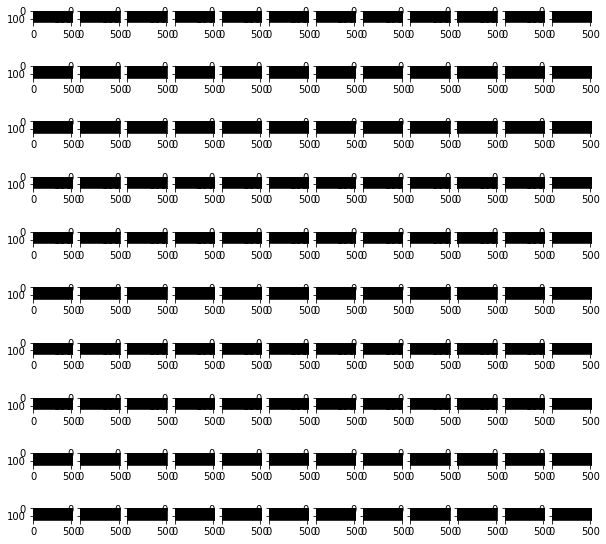

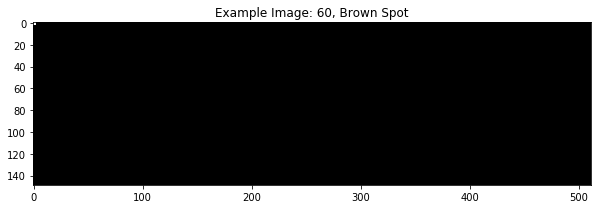

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def RGBtoBGR(images):
    BGR = []
    
    for image in images:
        BGR_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        BGR.append(BGR_img)
    
    BGR = np.asarray(BGR)
    return BGR
        

def BrightContrast(images):
    
    img = images[0]
    
    adjusted = np.zeros(img.shape)
    

    BC_images = []

    
    #Contrast [1.0-3.0]
    alpha = 1.4
    
    # Brightness [0-100]
    beta = 30
    
    print('Images',images.shape)
    print('Images [0]',images.shape[0])
    print('Y [1]',images.shape[1])
    print('X [2]',images.shape[2])
    print('RGB [3]',images.shape[3])
    
    for image in images:
        
        for x in range(len(images[0].shape)):
            for y in range(len(images[1].shape)):
                for colorval in range(len(images[3].shape)):
                    adjusted[y, x, colorval] = np.clip(alpha * image[y, x, colorval] + beta, 0, 255)
        
        BC_images.append(adjusted)

                    

                   
    
    BC_images = np.asarray(BC_images)
    #print(BC_images)
    return BC_images
                    

def GBlur(images):
    #Initializes empty array
    gblur_images = []
    
    for image in images:
        p_img = cv2.GaussianBlur(image, (9,9), 1)
        gblur_images.append(p_img)
        
    gblur_images = np.asarray(gblur_images)
    return gblur_images

def Plot(images):
    #print(images.shape)
    fig, ax = plt.subplots(10, 12, figsize=(10,10))
    plot_images = images.reshape((10,12,149,512,3))
    for i in range(10):
        for j in range(12):
            ax[i][j].imshow(plot_images[i][j])
    fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
    ax2.imshow(images[60])
    ax2.set_title('Example Image: 60, Brown Spot')
    plt.show()
    

def PreProcess(images):
    proccesed_images = GBlur(images)
    print('Processed Data',proccesed_images.shape)
    
    proccesed_images = BrightContrast(proccesed_images)
    
    return proccesed_images

def main():
    images = np.load('small_rld.npy')
    #print(images.shape)
    processed_images = PreProcess(images)
    #print(processed_images.shape)
    Plot(processed_images)


main()
